# **Data Exploration and Cleaning**

1. Importing required libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. Importing Datasets

In [ ]:
# Import user interactions dataset
user_interactions_df = pd.read_csv('user_interactions.csv')

In [ ]:
# Import purchase data dataset
purchase_data_df = pd.read_csv('purchase_data.csv')

In [ ]:
# Import website performance dataset
website_performance_df = pd.read_csv('website_performance.csv')

3. Data Exploration And Cleaning

## **1. User Interactions Dataset:**

In [ ]:
# View basic information
user_interactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   User_ID             5000 non-null   object
 1   Page_Viewed         5000 non-null   object
 2   Time_Spent_Seconds  5000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 117.3+ KB


In [ ]:
# Number of rows columns
user_interactions_df.shape

(5000, 3)

In [ ]:
# View first few rows
user_interactions_df.head()

,User_ID,Page_Viewed,Time_Spent_Seconds
0,User_3198,Homepage,560
1,User_126,Category Page,168
2,User_1376,Category Page,122
3,User_1117,Cart Page,329
4,User_3683,Category Page,391


In [ ]:
# View summary statistics
user_interactions_df.describe()

,Time_Spent_Seconds
count,5000.000000
mean,304.508800
std,168.978666
min,10.000000
25%,160.000000
50%,301.000000
75%,452.000000
max,599.000000


In [ ]:
# Check for missing values
user_interactions_df.isnull().sum()

User_ID               0
Page_Viewed           0
Time_Spent_Seconds    0
dtype: int64

In [ ]:
# Check for duplicates
user_interactions_df.duplicated().sum()

1

In [ ]:
# Handling duplicates
user_interactions_df.drop_duplicates(inplace=True)
user_interactions_df.duplicated().sum()

0

In [ ]:
num_of_pages_viewed = user_interactions_df['Page_Viewed'].count()
print(num_of_pages_viewed)

4999


## **2. Purchase Data Dataset:**

In [ ]:
# View basic information
purchase_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Purchase_ID         1000 non-null   object 
 1   User_ID             1000 non-null   object 
 2   Product_ID          1000 non-null   object 
 3   Transaction_Amount  1000 non-null   float64
 4   Purchase_Time       1000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 39.2+ KB


In [ ]:
# View first few rows
purchase_data_df.head()

,Purchase_ID,User_ID,Product_ID,Transaction_Amount,Purchase_Time
0,Purchase_948,User_3840,Product_19,62.843031,2023-04-02 16:35:46
1,Purchase_905,User_1846,Product_9,21.780079,2023-04-14 16:38:27
2,Purchase_704,User_1700,Product_8,138.264455,2023-01-21 11:21:31
3,Purchase_766,User_4117,Product_15,74.991367,2023-01-29 04:44:04
4,Purchase_36,User_3053,Product_7,162.569998,2023-05-24 03:30:23


In [ ]:
# View summary statistics
purchase_data_df.describe()

,Transaction_Amount
count,1000.000000
mean,106.348744
std,55.951244
min,10.429825
25%,58.426058
50%,102.950857
75%,157.533495
max,199.961345


In [ ]:
# Check for missing values
purchase_data_df.isnull().sum()

Purchase_ID           0
User_ID               0
Product_ID            0
Transaction_Amount    0
Purchase_Time         0
dtype: int64

In [ ]:
# Check for duplicates
purchase_data_df.duplicated().sum()

0

In [ ]:
# Convert purchase timestamp column to datetime object
purchase_data_df['Purchase_Time'] = pd.to_datetime(purchase_data_df['Purchase_Time'])

## **3. Website Performance Dataset:**

In [ ]:
# View basic information
website_performance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Month            12 non-null     object 
 1   Page_Load_Time   12 non-null     float64
 2   Bounce_Rate      12 non-null     float64
 3   Conversion_Rate  12 non-null     float64
dtypes: float64(3), object(1)
memory usage: 512.0+ bytes


In [ ]:
# View first few rows
website_performance_df.head()

,Month,Page_Load_Time,Bounce_Rate,Conversion_Rate
0,2023-01-01,5.106652,0.514345,0.047375
1,2023-02-01,7.828199,0.317157,0.062764
2,2023-03-01,3.239983,0.480903,0.050514
3,2023-04-01,5.954509,0.473572,0.057151
4,2023-05-01,9.872398,0.542407,0.089525


In [ ]:
# View summary statistics
website_performance_df.describe()

,Page_Load_Time,Bounce_Rate,Conversion_Rate
count,12.000000,12.000000,12.000000
mean,5.866266,0.452650,0.060056
std,2.288288,0.086482,0.014993
min,2.468395,0.301692,0.038263
25%,4.165375,0.389651,0.048626
50%,5.621936,0.477238,0.059957
75%,7.457142,0.517399,0.065832
max,9.872398,0.566843,0.089525


In [ ]:
# Check for missing values
website_performance_df.isnull().sum()

Month              0
Page_Load_Time     0
Bounce_Rate        0
Conversion_Rate    0
dtype: int64

In [ ]:
# Check for duplicates
website_performance_df.duplicated().sum()

0

# **User Behavior Analysis**

##**1. Identify the Most Visited Pages and Average Time Spent on Each Page:**
To perform the user behavior analysis, we will focus on the user_interactions_df DataFrame.

In [ ]:
# User Behavior Analysis
# Most visited pages and average time spent on each page
most_visited_pages = user_interactions_df['Page_Viewed'].value_counts().nlargest(10)
print("MOST VISITED PAGES : \n",most_visited_pages)


MOST VISITED PAGES : 
 Homepage         1045
Cart Page        1041
Checkout Page     989
Category Page     971
Product Page      953
Name: Page_Viewed, dtype: int64


In [ ]:

average_time_spent = user_interactions_df.groupby('Page_Viewed')['Time_Spent_Seconds'].mean()
print('Average Time Spent : \n', average_time_spent)

Average Time Spent : 
 Page_Viewed
Cart Page        302.819404
Category Page    297.868177
Checkout Page    306.760364
Homepage         310.215311
Product Page     304.562434
Name: Time_Spent_Seconds, dtype: float64


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
user_interactions_df.head()

,User_ID,Page_Viewed,Time_Spent_Seconds
0,User_3198,Homepage,560
1,User_126,Category Page,168
2,User_1376,Category Page,122
3,User_1117,Cart Page,329
4,User_3683,Category Page,391


In [ ]:
# Group by page and calculate the number of page views and average time spent
page_views_df = user_interactions_df.groupby('Page_Viewed')['User_ID', 'Time_Spent_Seconds'].agg({
    'User_ID': 'count',
    'Time_Spent_Seconds': 'mean'
}).reset_index()

page_views_df.head()

<ipython-input-31-9a3727e0ca22>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  page_views_df = user_interactions_df.groupby('Page_Viewed')['User_ID', 'Time_Spent_Seconds'].agg({


,Page_Viewed,User_ID,Time_Spent_Seconds
0,Cart Page,1041,302.819404
1,Category Page,971,297.868177
2,Checkout Page,989,306.760364
3,Homepage,1045,310.215311
4,Product Page,953,304.562434


In [ ]:
# Rename the columns for better readability
page_views_df.rename(columns={'User_ID': 'Num_of_times_visited', 'Time_Spent_Seconds': 'Average_Time_Spent'}, inplace=True)

# Sort by page views in descending order
page_views_df.sort_values(by='Num_of_times_visited', ascending=False, inplace=True)

page_views_df

,Page_Viewed,Num_of_times_visited,Average_Time_Spent
3,Homepage,1045,310.215311
0,Cart Page,1041,302.819404
2,Checkout Page,989,306.760364
1,Category Page,971,297.868177
4,Product Page,953,304.562434


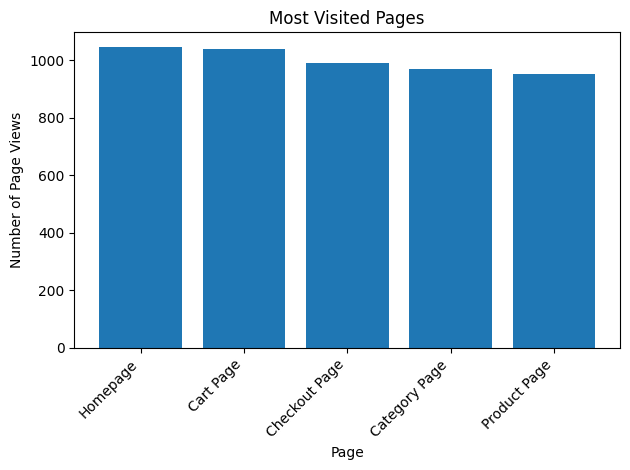

In [ ]:
# Plot the most visited pages

plt.bar(page_views_df['Page_Viewed'], page_views_df['Num_of_times_visited'])
plt.xlabel('Page')
plt.ylabel('Number of Page Views')
plt.title('Most Visited Pages')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


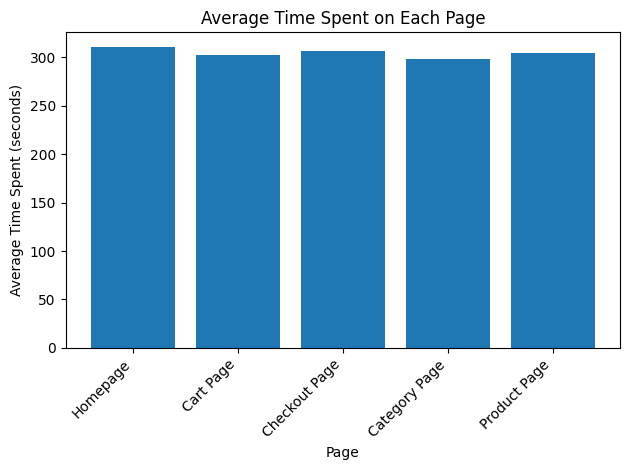

In [ ]:
# Plot the average time spent on each page

plt.bar(page_views_df['Page_Viewed'], page_views_df['Average_Time_Spent'])
plt.xlabel('Page')
plt.ylabel('Average Time Spent (seconds)')
plt.title('Average Time Spent on Each Page')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


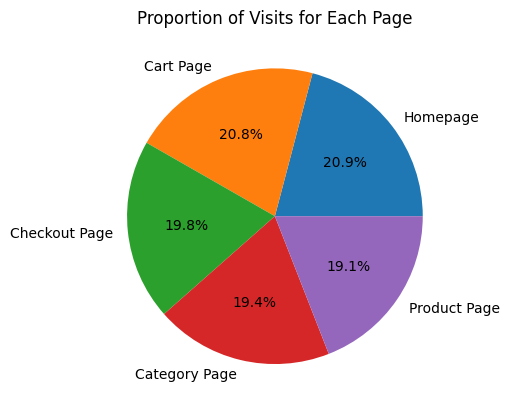

In [ ]:

# Data
pages = page_views_df['Page_Viewed']
num_visited = page_views_df['Num_of_times_visited']

# Create the pie chart
plt.pie(num_visited, labels=pages, autopct='%1.1f%%')

# Add title
plt.title('Proportion of Visits for Each Page')

# Show the plot
plt.show()

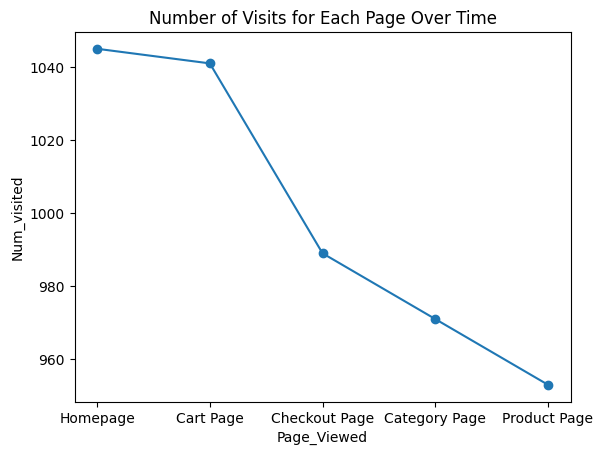

In [ ]:

# Data
pages = page_views_df['Page_Viewed']
num_visited = page_views_df['Num_of_times_visited']

# Create the line chart
plt.plot(pages, num_visited, marker='o')

# Add labels and title
plt.xlabel('Page_Viewed')
plt.ylabel('Num_visited')
plt.title('Number of Visits for Each Page Over Time')

# Show the plot
plt.show()

<ipython-input-37-07ab12bfe9d3>:14: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = df.pivot('Page_Viewed', 'Num_visited', 'Average_Time_Spent')


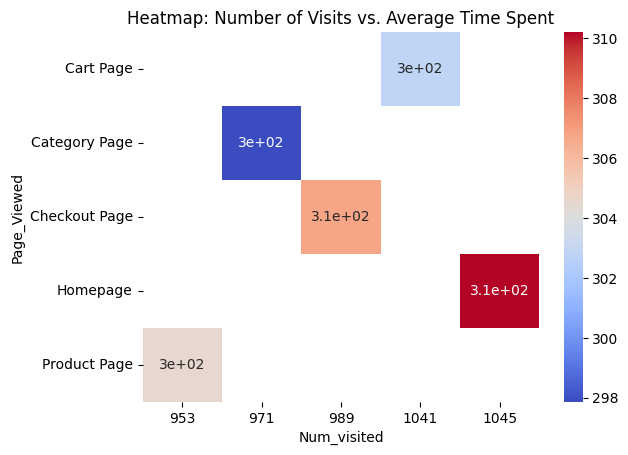

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
data = {
    'Page_Viewed': ['Homepage', 'Cart Page', 'Checkout Page', 'Category Page', 'Product Page'],
    'Num_visited': [1045, 1041, 989, 971, 953],
    'Average_Time_Spent': [310.21531100478467, 302.81940441882807, 306.7603640040445, 297.8681771369722, 304.56243441762854]
}
df = pd.DataFrame(data)

# Create the heatmap
heatmap_data = df.pivot('Page_Viewed', 'Num_visited', 'Average_Time_Spent')
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')

# Add title
plt.title('Heatmap: Number of Visits vs. Average Time Spent')

# Show the plot
plt.show()


## **2. Determine the Click-Through Rate for Different Sections:**

In [ ]:
# Create a new column 'Section' based on 'Page_Viewed'
user_interactions_df['Section'] = user_interactions_df['Page_Viewed'].apply(lambda x: 'homepage' if x == 'homepage' else 'product categories')


In [ ]:
# Group by section and calculate the number of clicks and page views for each section
section_clicks_df = user_interactions_df.groupby('Section')['User_ID'].count().reset_index()
section_views_df = user_interactions_df[user_interactions_df['Page_Viewed'] != 'homepage'].groupby('Section')['Page_Viewed'].count().reset_index()
section_clicks_df['Page_Viewed'] = section_views_df['Page_Viewed']



In [ ]:
# Calculate click-through rate (CTR) for each section
section_clicks_df['CTR'] = section_clicks_df['Page_Viewed'] / section_clicks_df['User_ID'] * 100


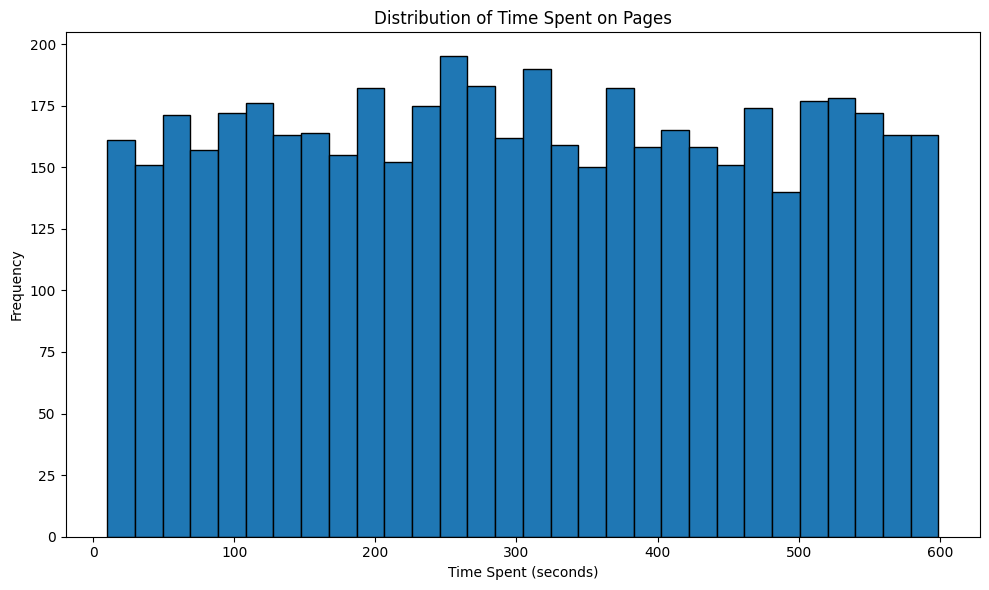

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(user_interactions_df['Time_Spent_Seconds'], bins=30, edgecolor='black')
plt.xlabel('Time Spent (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Time Spent on Pages')
plt.tight_layout()
plt.show()


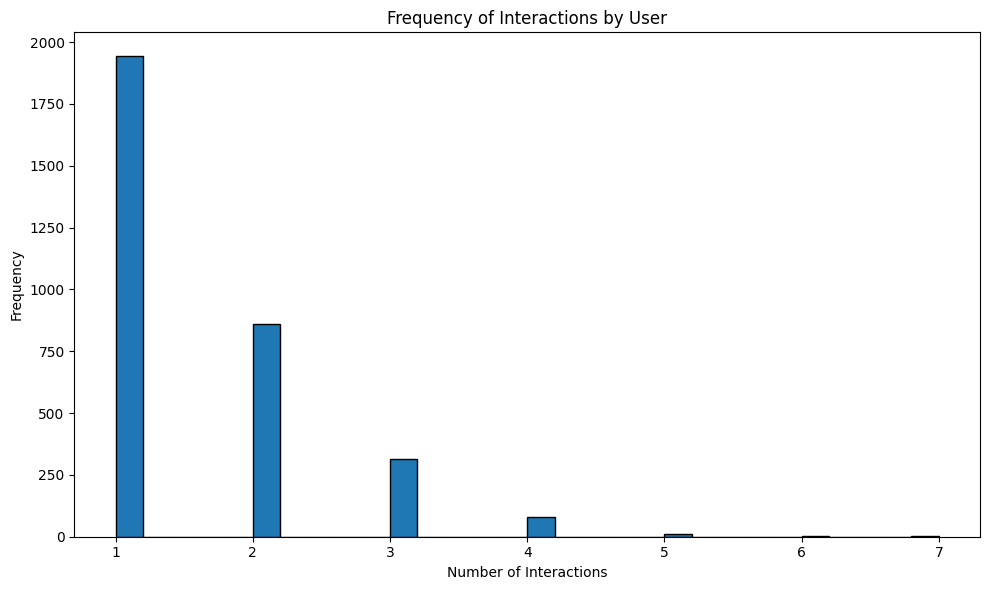

In [ ]:
user_interactions_count = user_interactions_df['User_ID'].value_counts()

plt.figure(figsize=(10, 6))
plt.hist(user_interactions_count, bins=30, edgecolor='black')
plt.xlabel('Number of Interactions')
plt.ylabel('Frequency')
plt.title('Frequency of Interactions by User')
plt.tight_layout()
plt.show()


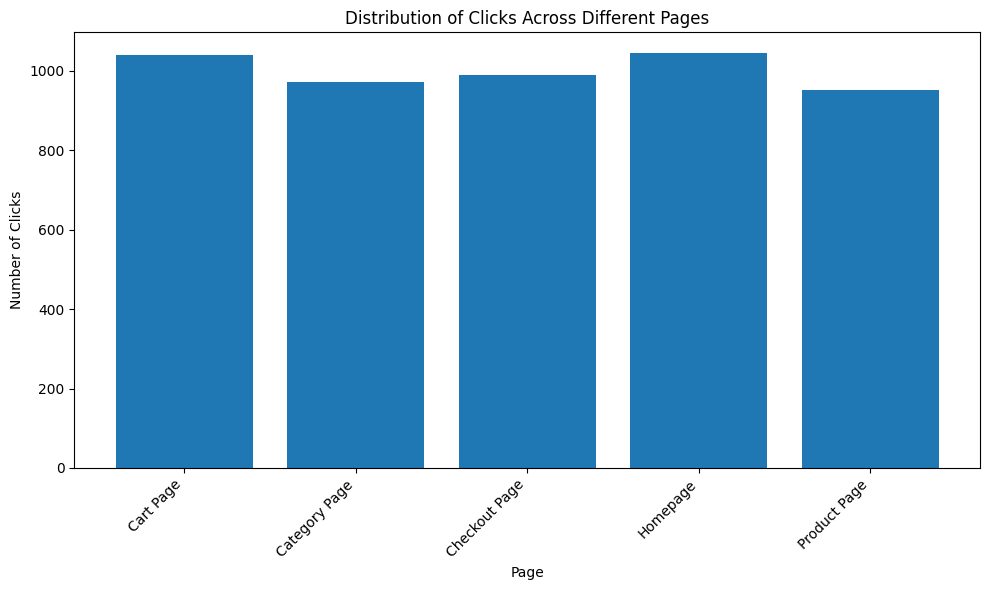

In [ ]:
clicks_by_page = user_interactions_df.groupby('Page_Viewed')['User_ID'].count()

plt.figure(figsize=(10, 6))
plt.bar(clicks_by_page.index, clicks_by_page)
plt.xlabel('Page')
plt.ylabel('Number of Clicks')
plt.title('Distribution of Clicks Across Different Pages')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Purchase Analysis**

## **1. Calculate the overall conversion rate for the website based on purchase data.**

In [ ]:
purchase_data_df

,Purchase_ID,User_ID,Product_ID,Transaction_Amount,Purchase_Time
0,Purchase_948,User_3840,Product_19,62.843031,2023-04-02 16:35:46
1,Purchase_905,User_1846,Product_9,21.780079,2023-04-14 16:38:27
2,Purchase_704,User_1700,Product_8,138.264455,2023-01-21 11:21:31
3,Purchase_766,User_4117,Product_15,74.991367,2023-01-29 04:44:04
4,Purchase_36,User_3053,Product_7,162.569998,2023-05-24 03:30:23
...,...,...,...,...,...
995,Purchase_489,User_2879,Product_14,47.047885,2023-04-10 17:38:54
996,Purchase_741,User_588,Product_1,85.587089,2023-02-19 15:05:57
997,Purchase_587,User_3821,Product_16,162.919467,2023-07-14 23:15:18
998,Purchase_222,User_1804,Product_10,44.435545,2023-03-03 15:37:35


In [ ]:
# Calculate the overall conversion rate for the website
conversion_rate = (purchase_data_df['User_ID'].nunique() / user_interactions_df['User_ID'].nunique()) * 100
print(f"Overall Conversion Rate: {conversion_rate:.2f}%")


Overall Conversion Rate: 28.54%


## **2. Identify the top-selling products and product categories.**

In [ ]:

# Identify the top-selling products and product categories
top_selling_products = purchase_data_df['Product_ID'].value_counts().nlargest(10)

print("\nTop Selling Products:")
print(top_selling_products)


Top Selling Products:
Product_19    66
Product_13    59
Product_4     58
Product_20    58
Product_7     56
Product_3     56
Product_17    56
Product_12    55
Product_15    51
Product_5     49
Name: Product_ID, dtype: int64


## **3. Explore the relationship between the number of interactions on the website and the likelihood of a purchase**

In [ ]:
# Merge user interactions and purchase data
user_interactions_with_purchase_df = user_interactions_df.merge(purchase_data_df[['User_ID', 'Purchase_ID']], on='User_ID', how='left')

# Calculate the likelihood of a purchase after interactions
likelihood_of_purchase = user_interactions_with_purchase_df.groupby('User_ID')['Purchase_ID'].count() > 0
likelihood_of_purchase = likelihood_of_purchase.value_counts(normalize=True) * 100

print("\nLikelihood of a Purchase after Interactions:")
print(likelihood_of_purchase)



Likelihood of a Purchase after Interactions:
False    80.996885
True     19.003115
Name: Purchase_ID, dtype: float64


# **Cohort Analysis**

## **1. Perform a cohort analysis based on user sign-up dates to understand user retention and behavior over time.**

1. Cohort Analysis based on First Purchase Date:

In [ ]:
user_interactions_df.head()


,User_ID,Page_Viewed,Time_Spent_Seconds,Section
0,User_3198,Homepage,560,product categories
1,User_126,Category Page,168,product categories
2,User_1376,Category Page,122,product categories
3,User_1117,Cart Page,329,product categories
4,User_3683,Category Page,391,product categories


In [ ]:
purchase_data_df.head()


,Purchase_ID,User_ID,Product_ID,Transaction_Amount,Purchase_Time
0,Purchase_948,User_3840,Product_19,62.843031,2023-04-02 16:35:46
1,Purchase_905,User_1846,Product_9,21.780079,2023-04-14 16:38:27
2,Purchase_704,User_1700,Product_8,138.264455,2023-01-21 11:21:31
3,Purchase_766,User_4117,Product_15,74.991367,2023-01-29 04:44:04
4,Purchase_36,User_3053,Product_7,162.569998,2023-05-24 03:30:23


In [ ]:
website_performance_df.head()

,Month,Page_Load_Time,Bounce_Rate,Conversion_Rate
0,2023-01-01,5.106652,0.514345,0.047375
1,2023-02-01,7.828199,0.317157,0.062764
2,2023-03-01,3.239983,0.480903,0.050514
3,2023-04-01,5.954509,0.473572,0.057151
4,2023-05-01,9.872398,0.542407,0.089525


In [ ]:
# Convert the 'Purchase_Time' column to datetime format in the purchase_data_df DataFrame
purchase_data_df['Purchase_Time'] = pd.to_datetime(purchase_data_df['Purchase_Time'])


In [ ]:
# Extract the month of the first purchase from the 'Purchase_Time'
purchase_data_df['First_Purchase_Month'] = purchase_data_df['Purchase_Time'].dt.to_period('M')


In [ ]:
# Group users by their First_Purchase_Month and calculate the number of unique users who made their first purchase in each month
cohort_purchases = purchase_data_df.groupby('First_Purchase_Month')['User_ID'].nunique()
cohort_purchases

First_Purchase_Month
2023-01    152
2023-02    129
2023-03    152
2023-04    144
2023-05    135
2023-06    137
2023-07    133
Freq: M, Name: User_ID, dtype: int64

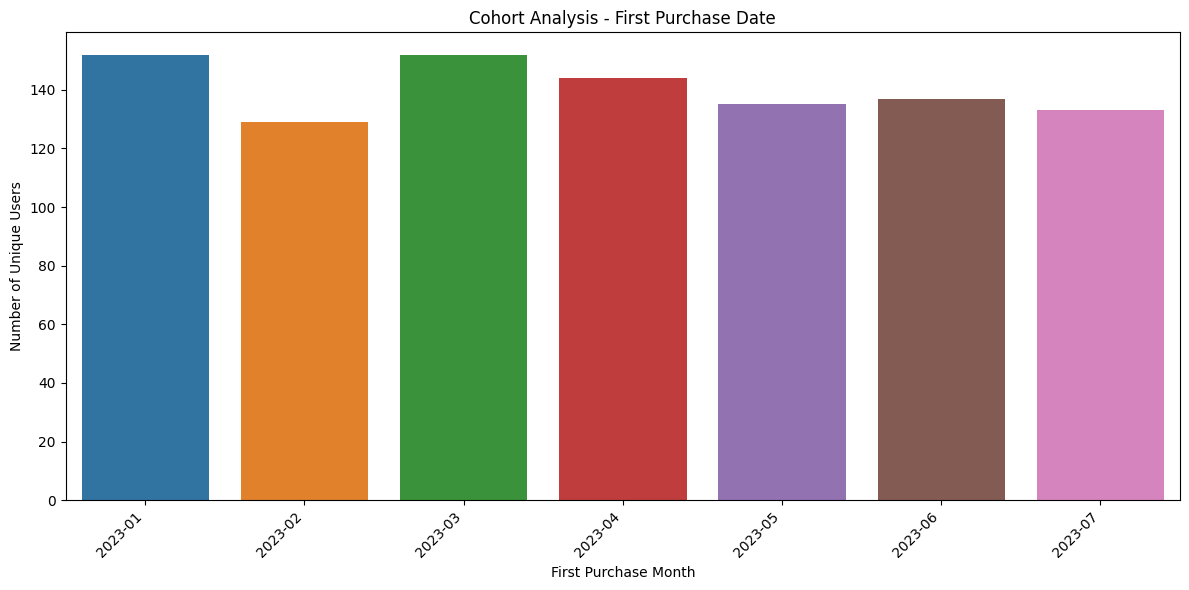

In [ ]:
# Plot the cohort analysis for purchases
plt.figure(figsize=(12, 6))
plt.title('Cohort Analysis - First Purchase Date')
sns.barplot(x=cohort_purchases.index, y=cohort_purchases.values)
plt.xlabel('First Purchase Month')
plt.ylabel('Number of Unique Users')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



2. Cohort Analysis based on First Website Visit Date:

In [ ]:
# Convert the 'Month' column to datetime format in the website_performance_df DataFrame
website_performance_df['Month'] = pd.to_datetime(website_performance_df['Month'])


In [ ]:
# Extract the month of the first website visit from the 'Month'
website_performance_df['First_Website_Visit_Month'] = website_performance_df['Month'].dt.to_period('M')

In [ ]:
# Aggregate website performance metrics by month
cohort_visits = website_performance_df.groupby('First_Website_Visit_Month').size()

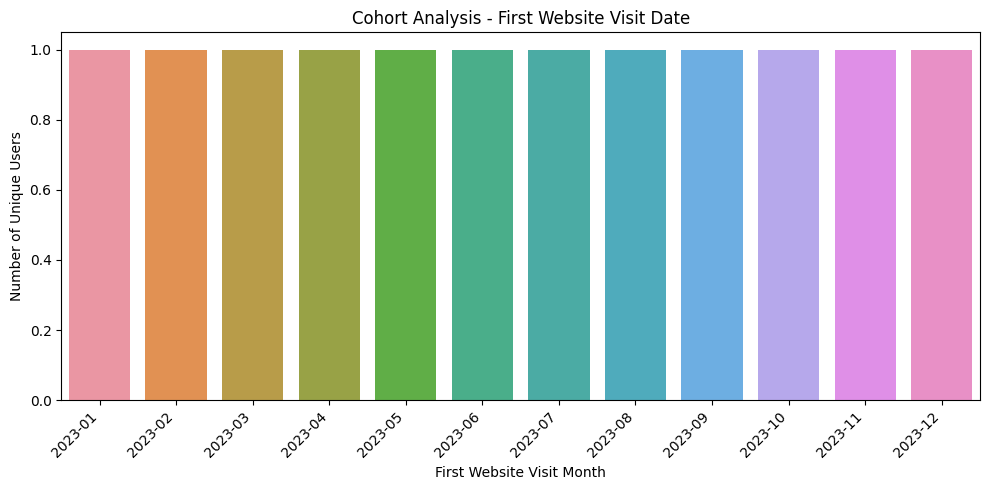

In [ ]:
# Plot the cohort analysis for website visits
plt.figure(figsize=(10, 5))
plt.title('Cohort Analysis - First Website Visit Date')
sns.barplot(x=cohort_visits.index, y=cohort_visits.values)
plt.xlabel('First Website Visit Month')
plt.ylabel('Number of Unique Users')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## **2. Determine the lifetime value (LTV) of customers acquired during different time periods.**

In [ ]:
# Calculate the total revenue for each customer
customer_revenue = purchase_data_df.groupby('User_ID')['Transaction_Amount'].sum()

# Calculate the average lifetime value (LTV) for customers
average_LTV = customer_revenue.mean()

print(f"Average Customer Lifetime Value (LTV): ${average_LTV:.2f}")


Average Customer Lifetime Value (LTV): $116.10


# **Website Performance Optimization**

## **1. Analyze website performance metrics to identify areas for improvement.**


In [ ]:
# Convert the 'Month' column to datetime format
website_performance_df['Month'] = pd.to_datetime(website_performance_df['Month'])


In [ ]:
# Calculate the average page load time, bounce rate, and conversion rate for each month
average_page_load_time = website_performance_df.groupby('Month')['Page_Load_Time'].mean()
average_bounce_rate = website_performance_df.groupby('Month')['Bounce_Rate'].mean()
average_conversion_rate = website_performance_df.groupby('Month')['Conversion_Rate'].mean()


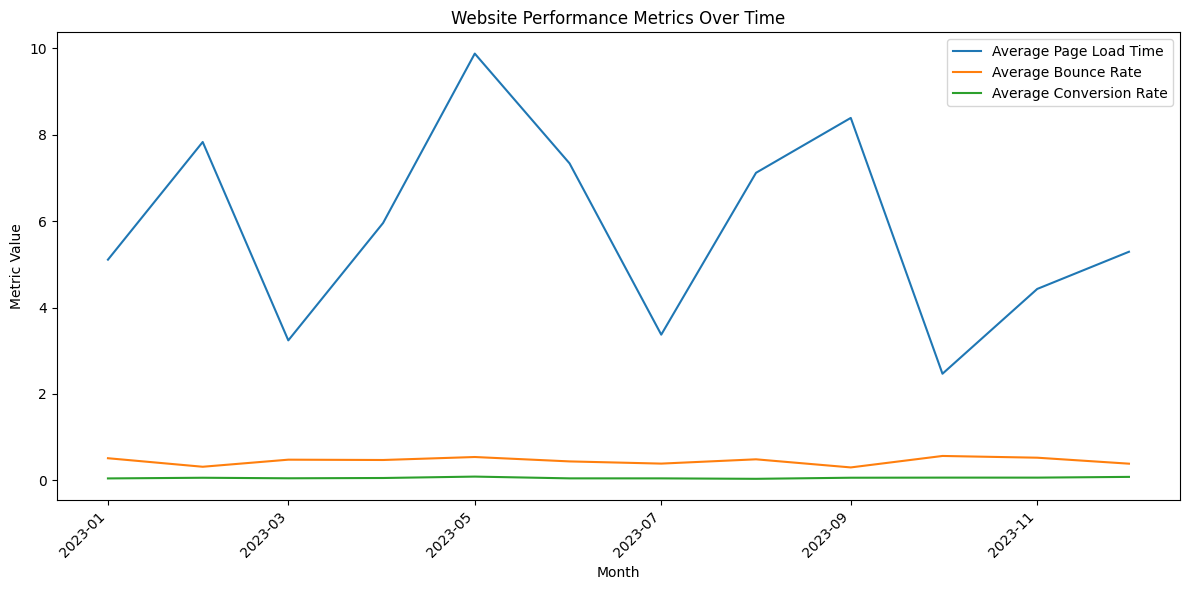

In [ ]:
# Plot the trends of website performance metrics over time
plt.figure(figsize=(12, 6))
plt.plot(average_page_load_time.index, average_page_load_time.values, label='Average Page Load Time')
plt.plot(average_bounce_rate.index, average_bounce_rate.values, label='Average Bounce Rate')
plt.plot(average_conversion_rate.index, average_conversion_rate.values, label='Average Conversion Rate')
plt.xlabel('Month')
plt.ylabel('Metric Value')
plt.title('Website Performance Metrics Over Time')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## **2. Propose Strategies to Reduce Bounce Rate and Improve Conversion Rate:**

Reducing the bounce rate and improving the conversion rate are crucial for enhancing user engagement and increasing conversions. Here are some strategies to achieve these goals:

a. Optimize Page Load Time: Minimize the page load time by optimizing images, using browser caching, and reducing unnecessary scripts and plugins.

b. Improve Content Relevance: Ensure that the website content aligns with users' expectations and search intent to reduce bounce rate.

c. Enhance User Experience: Make the website easy to navigate, mobile-friendly, and visually appealing to keep users engaged.

d. Implement Call-to-Action (CTA): Place clear and compelling CTAs strategically to encourage users to take the desired actions.

e. A/B Testing: Conduct A/B tests on different website elements (e.g., CTA buttons, layout) to identify what works best for improving conversions.

## **3. Create a Visualization Dashboard for Real-time Monitoring:**

Kindly follow the link to see the Power BI visualization dashboard.

Link : https://drive.google.com/drive/folders/1I919m9RzO_g4ErZb6mg4qfsG3H0XNjRi?usp=sharing

Dashboard Img

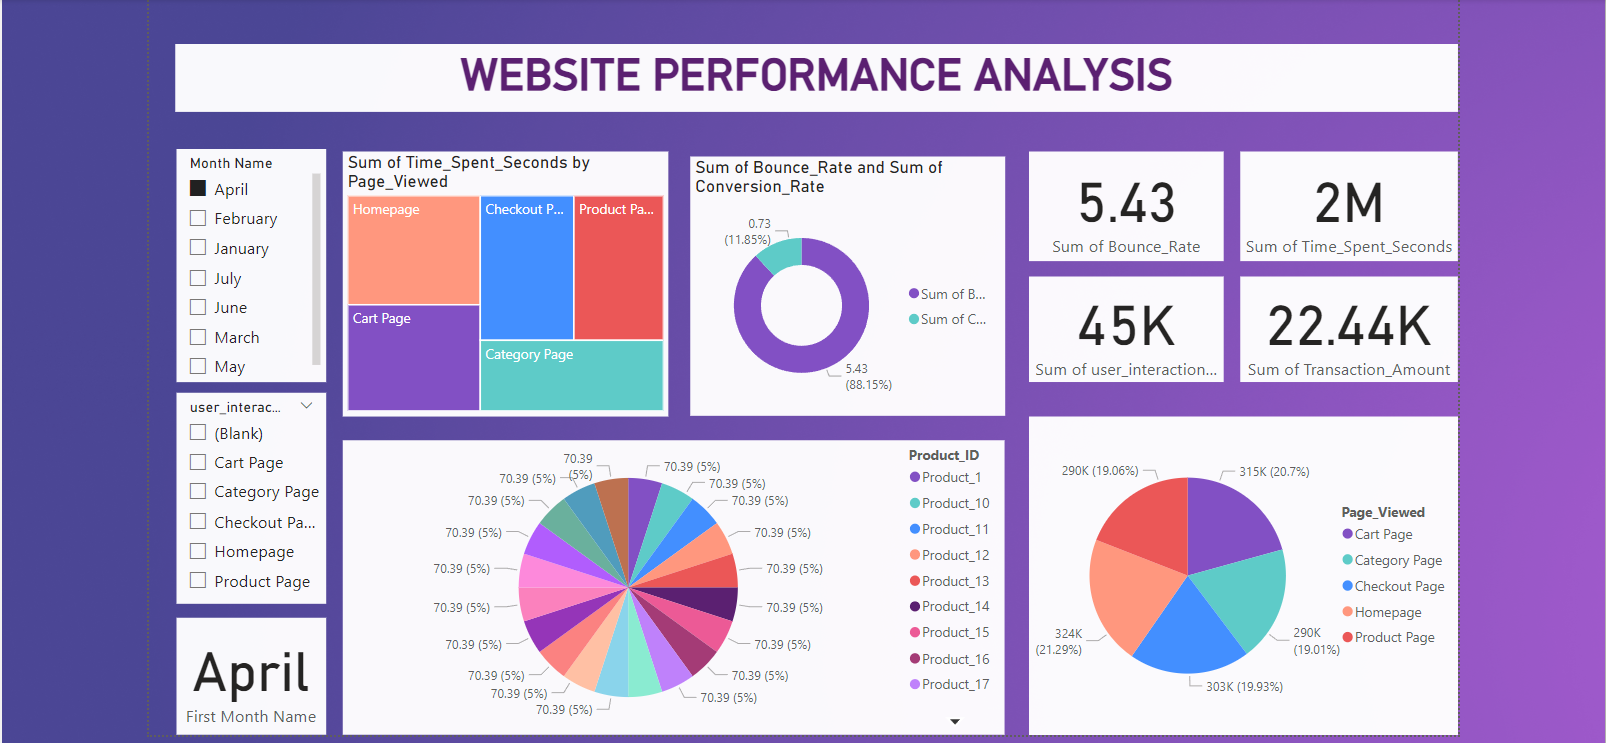